In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv('../datasets/ML_data/boston.csv')
df = raw.copy()
df.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
# 독립변수, 종속변수 (지도학습 : 가격(y) 존재)
y = df.medv
X = df.iloc[:, :-1]

In [6]:
# 훈련용 / 테스트
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# 모델링 (선형회귀분석)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
# 모델 성능평가
y_pred = lr.predict(X_test)
y_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [9]:
# 회귀분석 평가지표
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('MSE : %.2f' %mse)
print('RMSE : %.2f' %rmse)
print('MAE : %.2f' %mae)

MSE : 21.52
RMSE : 4.64
MAE : 3.16


In [10]:
r2 = r2_score(y_test, y_pred)
print('R-Square : %.2f' %r2)

R-Square : 0.71


In [11]:
print('y절편 :', np.round(lr.intercept_, 2))
print('회귀계수 값 :', np.round(lr.coef_, 2))

y절편 : 31.63
회귀계수 값 : [-1.300e-01  4.000e-02  5.000e-02  3.120e+00 -1.542e+01  4.060e+00
 -1.000e-02 -1.390e+00  2.400e-01 -1.000e-02 -9.100e-01  1.000e-02
 -5.500e-01]


In [12]:
coef = pd.Series(data=lr.coef_, index=X.columns)
coef.sort_values(ascending=False)

rm          4.057199
chas        3.119835
rad         0.242727
indus       0.049523
zn          0.035809
b           0.011794
tax        -0.008702
age        -0.010821
crim       -0.133470
lstat      -0.547113
ptratio    -0.910685
dis        -1.385998
nox       -15.417061
dtype: float64

In [13]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

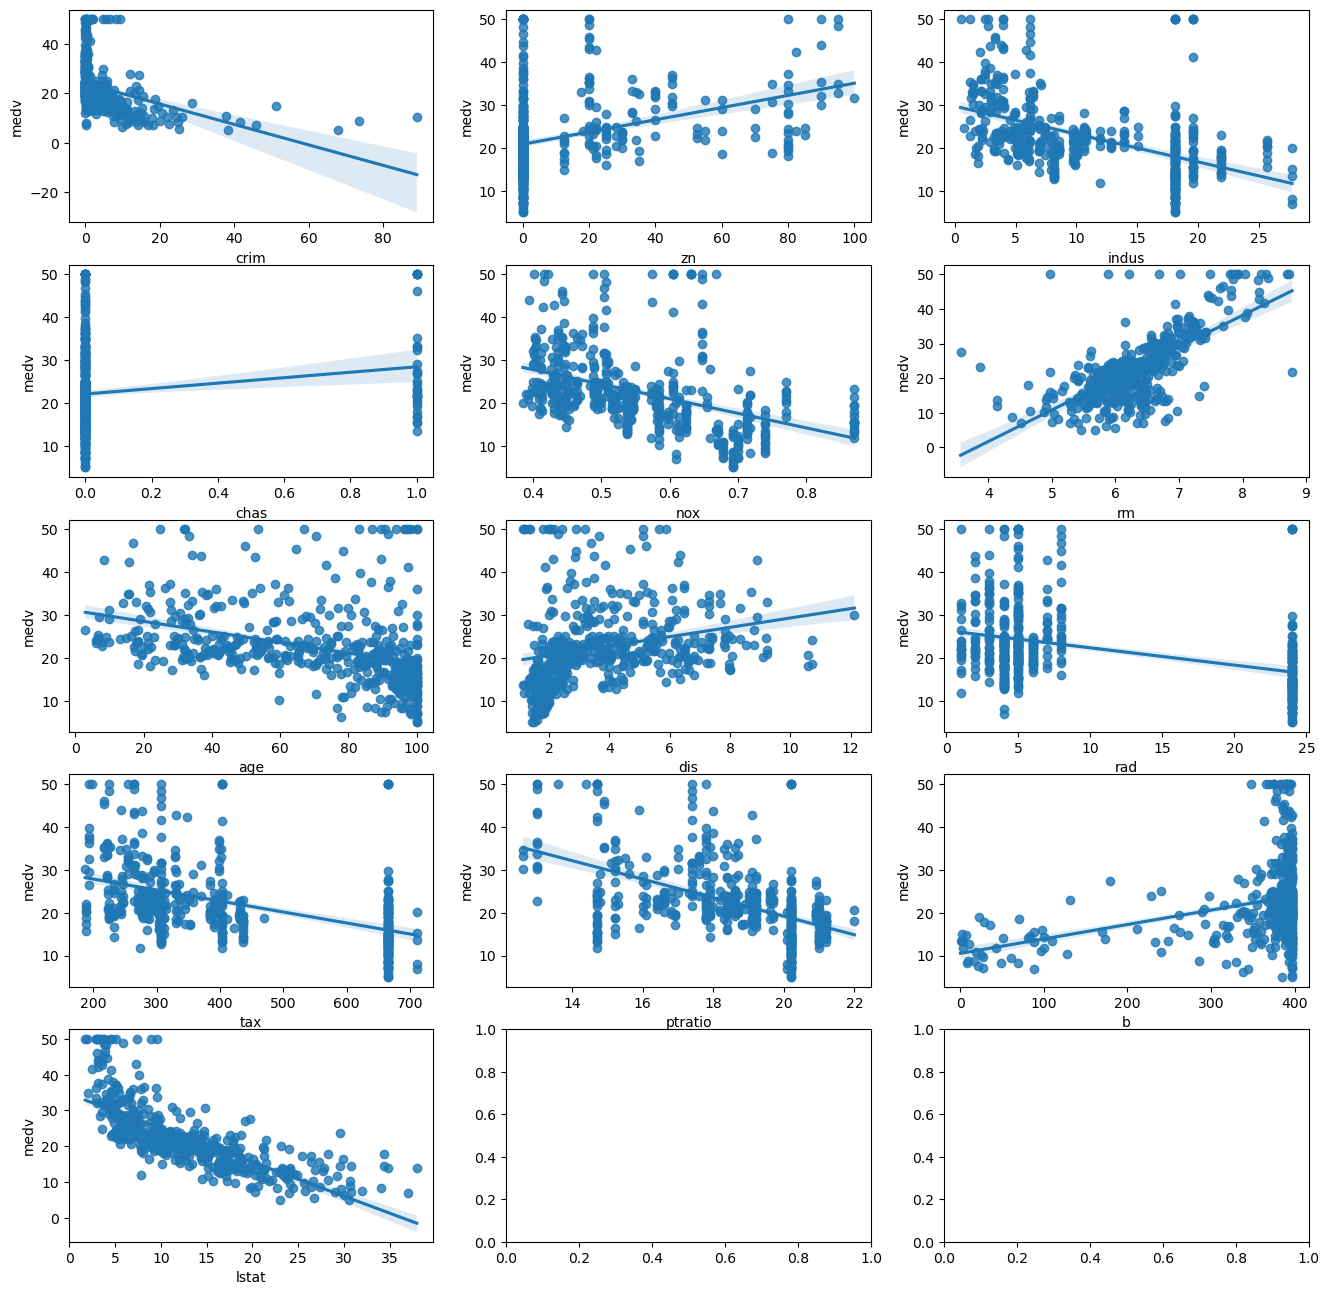

In [14]:
# 데이터 시각화
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)
X_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

for i, feature in enumerate(X_features):
    row = int(i/3)
    col = i % 3
    sns.regplot(x=feature, y='medv', data=df, ax=ax[row][col])
plt.show()

# [ 회귀 분석 + 산점도 선형 회귀 그래프 ] 항목에 따른 자동차 연비 예측하기

## 데이터 준비 및 탐색
* 분석에 필요없는 컬럼을 제거하고 데이터셋의 내용을 확인

In [22]:
import numpy as np
import pandas as pd

In [16]:
auto_raw = pd.read_csv('../datasets/ML_data/auto-mpg.csv', header=0, engine='python')
auto_df = auto_raw.copy()

print(auto_df.shape)
auto_df.head(2)

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [17]:
# 분석에 사용하지 않는 컬럼 제거
auto_df = auto_df.drop(['car_name', 'origin', 'horsepower'], axis=1)
auto_df.head(2)

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
# 독립변수 X, 종속변수 y 구분하기
y = auto_df['mpg'] # mpg : 연비
X = auto_df.drop(['mpg'], axis=1)

In [20]:
# 훈련, 평가 데이터 분할
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=42)

## 모델링 : 선형회귀분석

In [21]:
# 모델 생성
lr = LinearRegression()

# 모델 훈련
lr.fit(X_train, y_train)

# 예측하기
y_pred = lr.predict(X_test)
y_pred

array([31.52848751, 30.78891693, 21.49371422, 16.95818177, 12.74346605,
       26.27542683, 28.95160986,  8.57404465, 17.70905303, 22.76276182,
       12.06270523, 34.98678288, 26.75925599, 14.13190304, 24.77686404,
        5.90211418, 30.98096323, 24.14563349, 15.32246178, 35.14651783,
       23.57425408, 19.77317246, 29.00746195, 30.34318909, 15.02902547,
       34.58776778, 25.91010457, 25.7238098 , 21.9802649 ,  7.78561225,
       29.38187731, 34.83529534, 19.72937968, 24.95317633, 33.18325769,
       11.66203721, 24.62355093, 21.9712633 , 12.62192264, 27.07517458,
       27.70206864, 27.40545058, 20.56129032,  7.63958438, 23.35334483,
       33.52020372, 26.61655631, 24.56978886, 22.93507616, 27.88326319,
       23.42668416, 32.59073851, 31.34539081, 10.15335707, 29.09848666,
        9.01439141, 19.08865732, 28.34075589, 24.10748781, 20.80566575,
       16.0507234 , 30.74500303, 24.93471638, 20.63643734, 21.7194628 ,
       24.37761768, 25.88257121, 33.72470041, 29.43020136, 12.88

In [22]:
# 모델 평가
# mse, rmse, mae

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('MSE :', np.round(mse, 2))
print('RMSE :', np.round(rmse, 2))
print('MAE :', np.round(mae, 2))

MSE : 9.93
RMSE : 3.15
MAE : 2.56


In [23]:
print('y절편 :', np.round(lr.intercept_, 2))
print('회귀계수 값 :', np.round(lr.coef_, 2))

y절편 : -18.63
회귀계수 값 : [ 0.24 -0.01 -0.01  0.07  0.79]


In [25]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending=False)

model_year      0.79
cylinders       0.24
acceleration    0.07
displacement   -0.01
weight         -0.01
dtype: float64

* 회귀식
* y_pred(y_hat) = 0.79(model_year) + 0.24(cylinders) + 0.07(acceleration) + (-0.01)(displacement) + (-0.01)(weight) + (-18.63)

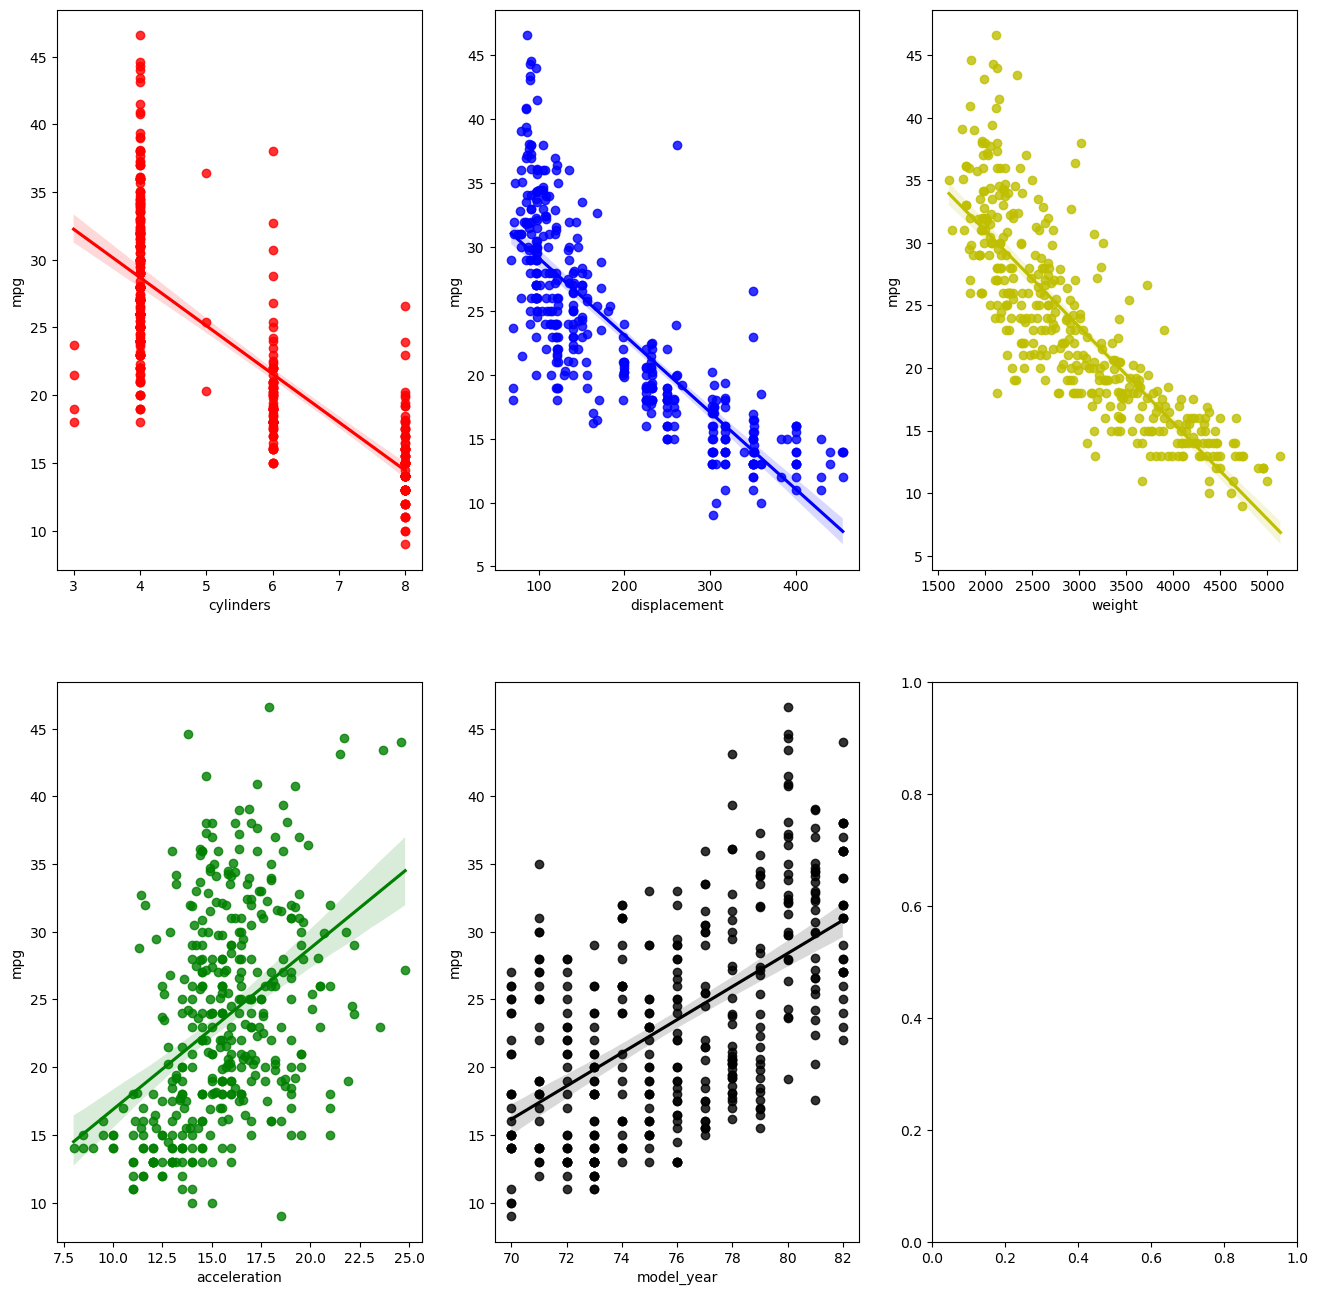

In [27]:
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)

X_features = ['cylinders', 'displacement', 'weight', 'acceleration', 'model_year']
plot_color = ['r', 'b', 'y', 'g', 'k']

for i, feature in enumerate(X_features):
    row = int(i / 3)
    col = i % 3
    sns.regplot(x=feature, y='mpg', data=auto_df, ax=ax[row][col], color=plot_color[i])

# 자동차 연비 예측 프로그램

In [28]:
def pred_car_mpg():
    cylinder = int(input('cylinders : '))
    displacement = int(input('displacement : '))
    weight = int(input('weight : '))
    acceleration = int(input('acceleration : '))
    model_year = int(input('model_year : '))

    car_info = {
        'cylinders' : cylinder,
        'displacement' : displacement,
        'weight' : weight,
        'acceleration' : acceleration,
        'model_year' : model_year
    }
    return car_info

In [29]:
print('연비를 예측하고 싶은 차의 정보를 입력하세요.')
car_info = pred_car_mpg()

연비를 예측하고 싶은 차의 정보를 입력하세요.


cylinders :  8
displacement :  350
weight :  3200
acceleration :  22
model_year :  99


In [30]:
car_features = \
np.array([[car_info['cylinders'],
           car_info['displacement'],
           car_info['weight'],
           car_info['acceleration'],
           car_info['model_year']]])

In [31]:
# 예상 연비 구하는 방법 1
predicted_mpg = lr.predict(car_features)
print('예상 연비 :', predicted_mpg[0])

예상 연비 : 40.45564497317087


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
# 예상 연비 구하는 방법 2
predicted_mpg = lr.predict([list(car_info.values())])
print(predicted_mpg)

[40.45564497]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print('연비를 예측하고 싶은 차의 정보를 입력하세요.')
# 차 정보 입력
car_info = pred_car_mpg()

data = []
# data 리스트에 car_info value 값 넣기
for k in car_info:
    data.append(car_info[k])

# value값으로 mpg 예측하기
predicted_mpg = lr.predict([data])
print(f'예상 연비(MPG) : {predicted_mpg[0]}')